 **Predicting software engineer salaries**

With the use of regression and natural language processing to find any significant patterns

In [23]:
#import libraries
import csv 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

**Importing dataset**

In [8]:
#load the data into a Pandas dataframe
jobs=pd.read_csv('Salaries_dataset.csv')
#display the first 3 rows on train_features
print(jobs.info())
jobs.head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Title             495 non-null    object 
 1   Company           493 non-null    object 
 2   Links             500 non-null    object 
 3   Ratings           310 non-null    float64
 4   Address           494 non-null    object 
 5   Salary            103 non-null    object 
 6   Job description   494 non-null    object 
 7   full-description  500 non-null    object 
dtypes: float64(1), object(7)
memory usage: 31.4+ KB
None


,Title,Company,Links,Ratings,Address,Salary,Job description,full-description
0,Software Engineer Degree Apprentice,Blue Engineering,https://uk.indeed.com/pagead/clk?mo=r&ad=-6NYl...,NaN,London N1 6NU,"£16,000 a year",We are seeking a full-time software engineer a...,Software Engineer Degree Apprentice\nSalary: £...
1,Software Engineering Apprenticeship Registrati...,MI5,https://uk.indeed.com/rc/clk?jk=23e818204b884a...,NaN,London,NaN,On this Software Engineering Apprenticeship Yo...,On this Software Engineering Apprenticeship\n\...
2,Software Engineer Apprentice,Lloyds Banking Group,https://uk.indeed.com/rc/clk?jk=52b45930987414...,3.8,Bristol,"£27,540 - £32,130 a year",Build simple data models and software designs....,"Please note, this site is only for external ca..."


In our dataset there are 7 object features and 1 float feature. And later one we will create an integer colum for average sallary. The features Links, Address will not be further explored, as they won't have an impact on the salary.

**Data Cleaning**

In [10]:
#look for duplicate data  or corrupt data and remove it
jobs.duplicated().sum()

81

In [18]:
import re
import seaborn as sns

#Function that formats sallary to a single value of salary per year
def string_to_salary(x):
    #check if the salary is already correctly formatted
    if type(x) == int:
        return x
    
    #Check if salary given as yearly
    elif 'a year' in str(x).lower():
        # check if salary given as a range
        if '-' in str(x):
            # remove dollar signs from string 
            x.replace("$", '')
            #find only the digits and commas
            nums = re.findall('[\d,]+', x)
            sum_ = 0
            #for each digit with comma separator, replace the comma
            for num in nums:
                #keep a track of the sum of the salary range
                sum_ += int(num.replace(',', ''))
            #return average of salary range
            return (sum_/len(nums))
        else:
            # remove dollar signs from string
            x.replace("$", '')
            #find only the digits and commas
            num = re.findall('[\d,]+', x)
            return float(num[0].replace(",",""))
    
    #check if salary is monthly
    elif 'a month' in str(x).lower():
        # check if salary given as a range
        if '-' in str(x):
            # remove dollar signs from string
            x.replace("$", '')
            nums = re.findall('[\d,]+', x)
            sum_ = 0
            #for each digit with comma separator, replace the comma
            for num in nums:
                #keep a track of the sum of the salary range
                sum_ += int(num.replace(',', ''))
            #return average of salary range multiply by 12 for months 
            return (sum_/len(nums)) * 12
        else:
            # remove dollar signs from string
            x.replace("$", '')
            #find only the digits and commas
            num = re.findall('[\d,]+', x)
            #multiply rate by 12 for months in year
            return float(num[0].replace(",","")) * 12
            
    
    #check if salary is hourly
    elif 'an hour' in str(x).lower():
        # check if salary given as a range
        if '-' in str(x):
            # remove dollar signs from string
            x.replace("$", '')
            #find only the digits and decimal places
            nums = re.findall('[\d.]+', x)
            sum_ = 0
            for num in nums:
                sum_ += float(num)
            return sum_/len(nums) * 2000
        else:
            x.replace("$", '')
            #find only the digits and decimal places
            nums = re.findall('[\d.]+', x)
            sum_ = 0
            for num in nums:
                sum_ += float(num.strip())
        #return average of salary range
        return sum_ * 2000

#run the function above
jobs['real_salary'] = jobs['Salary'].map(string_to_salary)

#(MAKE A DATAFRAME COMPARE)
temp_df = jobs[jobs.real_salary>0]
df_compare = pd.DataFrame({'Actual':temp_df['Salary'], 'Average': temp_df['real_salary']})
df_head = df_compare.head(25)
print(df_head)

                        Actual   Average
0               £16,000 a year   16000.0
2     £27,540 - £32,130 a year   29835.0
8               £31,850 a year   31850.0
10    £32,000 - £40,000 a year   36000.0
12    £32,000 - £40,000 a year   36000.0
14              £21,500 a year   21500.0
18    £35,000 - £70,000 a year   52500.0
21           £10 - £15 an hour   25000.0
39              £35,000 a year   35000.0
44   £90,000 - £116,000 a year  103000.0
57    £39,309 - £48,226 a year   43767.5
69    £60,000 - £90,000 a year   75000.0
70    £57,495 - £83,214 a year   70354.5
72    £55,000 - £80,000 a year   67500.0
74              £24,000 a year   24000.0
85    £40,057 - £45,839 a year   42948.0
92    £57,861 - £75,710 a year   66785.5
99    £68,139 - £75,710 a year   71924.5
103   £26,473 - £73,033 a year   49753.0
112   £32,601 - £49,491 a year   41046.0
135             £30,000 a year   30000.0
146   £45,066 - £69,041 a year   57053.5
148             £32,000 a year   32000.0
149   £40,000 - 

**Data Analysis**

In [59]:
#summarize each feature variable
def plot_feat(df, col, num):
    if num ==1:
      plt.figure(figsize=(20,15))
      plt.subplot(3,1,1)
      my_order = df.groupby(by=[col])['real_salary'].median().sort_values(ascending=True).index
      sns.boxplot(x=col, y="real_salary", data=df, order=my_order)
    else:
      plt.figure(figsize=(20,15))
      plt.subplot(3,1,1)
      my_order = df.groupby(by=[col])['real_salary'].median().sort_values(ascending=True).index
      sns.boxplot(x=col, y="real_salary", data=df, order=my_order)
        
      plt.subplot(3,1,2)
      mean=df.groupby(by=[col])['real_salary'].mean().sort_values().plot()
      plt.xlabel(col)
      plt.ylabel('mean real_salary')
      
      plt.subplot(3,1,3)
      df[col].value_counts().sort_values().plot() 
      plt.xlabel(col)
      plt.ylabel('count')
    
    plt.show()   

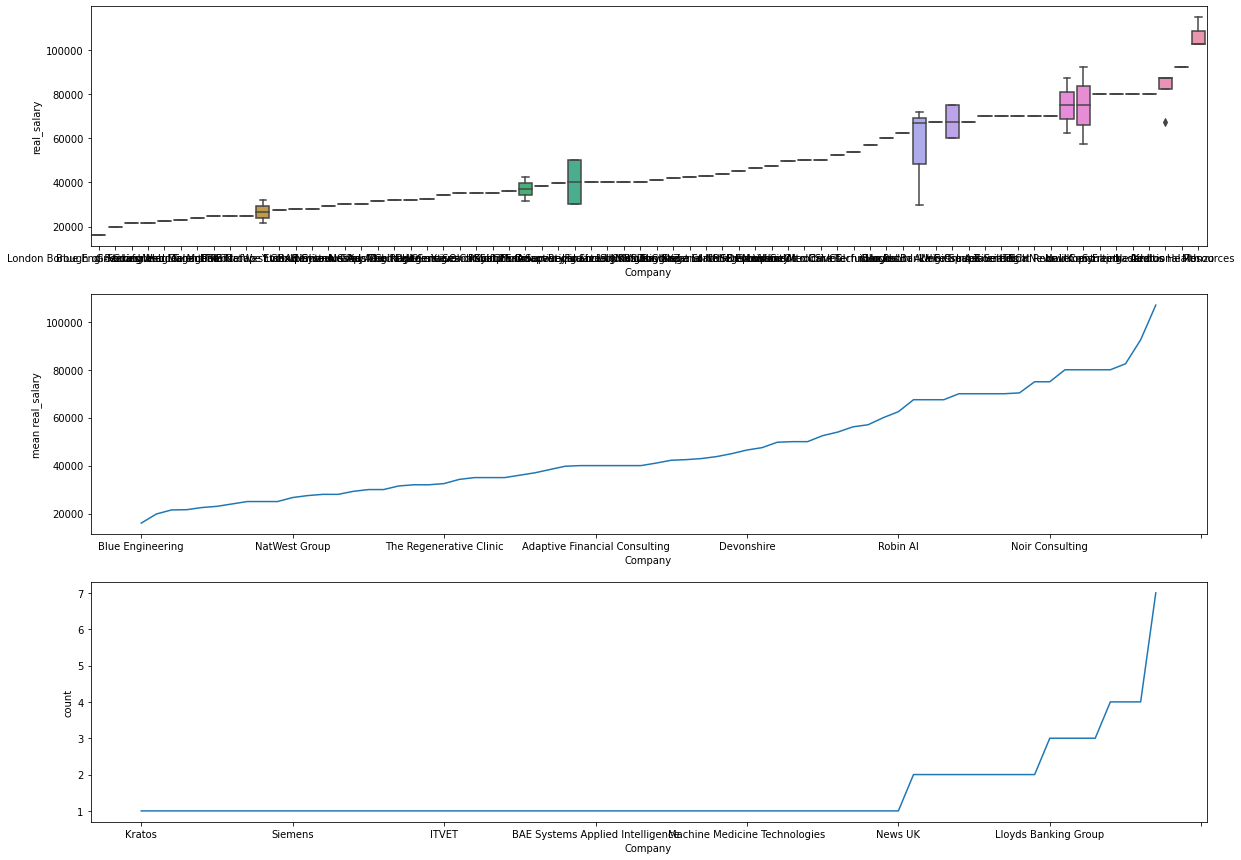

In [62]:
plot_feat(temp_df, 'Company',0)

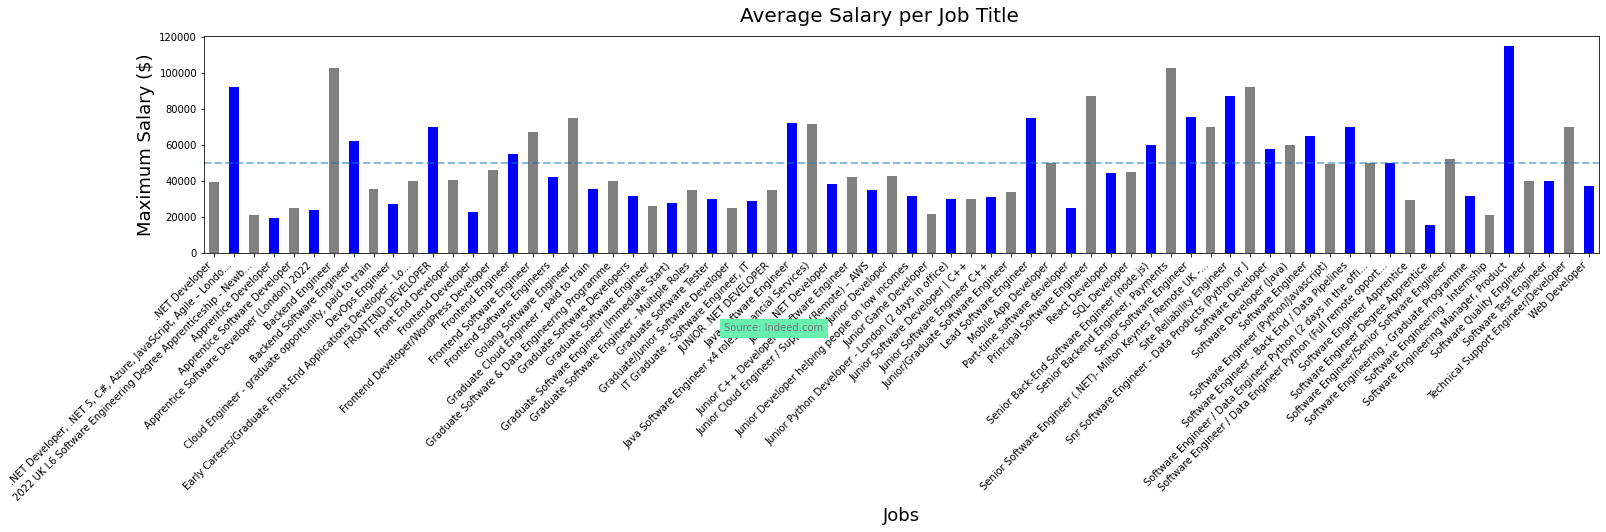

In [72]:
fig, ax = plt.subplots(figsize=(25, 4))
jobs[jobs.real_salary > 0].groupby('Title').mean().plot(
    kind='bar', y='real_salary', ax=ax, color=['gray', 'blue'])

fig.suptitle("Average Salary per Job Title", fontsize=20,)

ax.axhline(y = jobs.real_salary.mean(),ls='dashed',
           linewidth=2,alpha=0.5,label='All Jobs Average')

ax.legend_.remove()
ax.set_ylabel('Maximum Salary ($)',fontsize=18)
ax.set_xlabel('Jobs',fontsize=18)
plt.xticks(rotation=45,ha='right')
ax.annotate('Source: Indeed.com', (0, 0), (520, -70),
            xycoords='axes fraction', textcoords='offset points',
            va='top', fontsize=10, color='#757575', 
            backgroundcolor='#69F0AE')
plt.show()

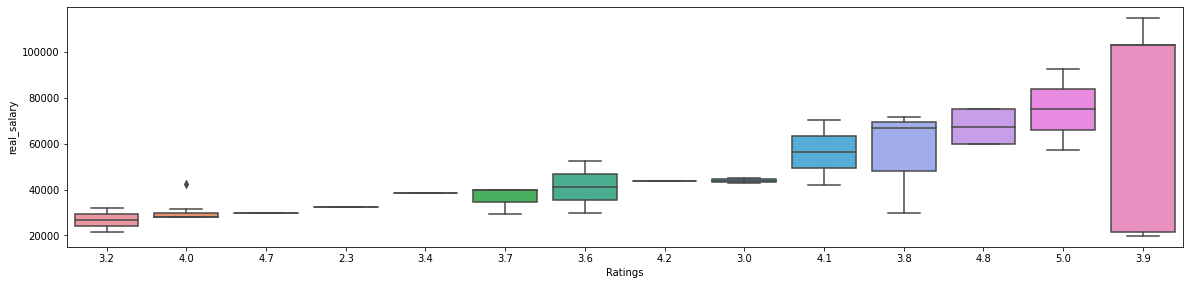

In [60]:
plot_feat(temp_df, 'Ratings', 1)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


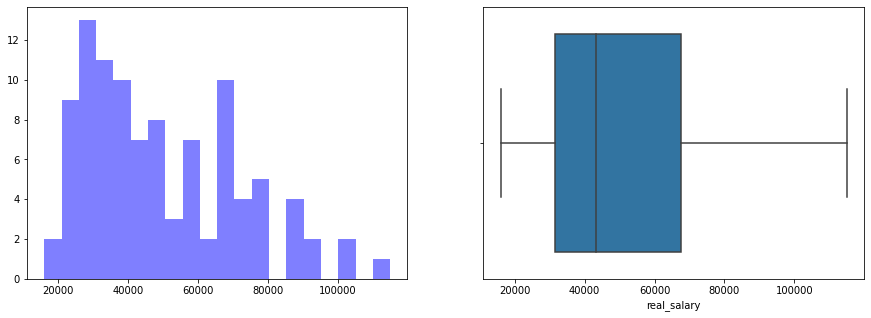

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


30000.0
50046.85
70000.0


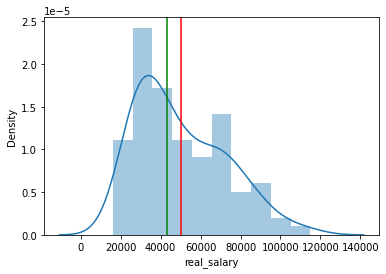

In [63]:
#summarize the target variable
plt.figure(figsize=(15,5))
salary=temp_df['real_salary']
plt.subplot(1,2,1)
num_bins=20
n, bins, patches=plt.hist(salary, num_bins, facecolor='blue', alpha=0.5)
plt.subplot(1,2,2)
sns.boxplot('real_salary', data=temp_df)
plt.show()
twentieth = jobs['real_salary'].quantile(0.20)
eightieth = jobs['real_salary'].quantile(0.80)

def percent_classifier(col):    
    
    if col < twentieth:
        return 0
    elif col >= twentieth and col < eightieth:
        return 1 
    else:
        return 2
jobs['salary_class'] = jobs['real_salary'].apply(percent_classifier)

import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

ax = sns.distplot(jobs['real_salary'], bins=10)
ax.axvline(jobs['real_salary'].mean(), c='r')
ax.axvline(jobs['real_salary'].median(), c='g')

print(twentieth)
print(jobs['real_salary'].mean())
print(eightieth)
# print(jobs['salary_class'])

In [55]:
temp_df.groupby(['Title'])['real_salary'].mean().sort_values()

Title
Software Engineer Degree Apprentice                                 16000.0
Apprentice Developer                                                19801.0
Software Engineering - Internship                                   21500.0
2022 UK L6 Software Engineering Degree Apprenticeship - Newb...     21500.0
Junior Game Developer                                               21600.0
                                                                     ...   
.NET Developer, .NET 5, C#, Azure, JavaScript, Agile – Londo...     92500.0
Snr Software Engineer - Data Products (Python or J                  92500.0
Senior Backend Engineer, Payments                                  103000.0
Backend Engineer                                                   103000.0
Software Engineering Manager, Product                              115000.0
Name: real_salary, Length: 70, dtype: float64

In [57]:
#look for correlation between each feature and the target
temp_df.corr()

,Ratings,real_salary
Ratings,1.000000,0.359268
real_salary,0.359268,1.000000


Here we testing the correlation between the salary and the ratings


**Building our neural network model**


**Features and Labels**

**Training and Testing Set**